# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [11]:
#Import all the necessary modules
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [6]:
wine_df = pd.read_csv('winequality-red.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [7]:
wine_df.head(10)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,NaN,NaN
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,NaN,NaN
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,NaN,NaN
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,NaN,NaN
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,NaN,NaN
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,NaN,NaN
6,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,NaN,NaN
7,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5,NaN,NaN
8,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7,NaN,NaN
9,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7,NaN,NaN


In [13]:
wine_df.columns

Index(['Cultivator', 'Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Q3 Print the datatypes of each column and the shape of the dataset 

In [8]:
wine_df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
wine_df.shape

# Q4 Print the descriptive statistics of each & every column using describe() function

In [9]:
wine_df.describe().transpose()
wine_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
Cultivator              1600 non-null object
Alchol                  1600 non-null object
Malic_Acid              1600 non-null object
Ash                     1600 non-null object
Alcalinity_of_Ash       1600 non-null object
Magnesium               1600 non-null object
Total_phenols           1600 non-null object
Falvanoids              1600 non-null object
Nonflavanoid_phenols    1600 non-null object
Proanthocyanins         1600 non-null object
Color_intensity         1600 non-null object
Hue                     1600 non-null object
OD280                   0 non-null float64
Proline                 0 non-null float64
dtypes: float64(2), object(12)
memory usage: 175.1+ KB


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

In [ ]:
#plot the graphs of different variable to see the distributions.

In [ ]:
#for example - 
#Sulfur.dioxide (both Free and Total) is distributed over a wide range across the samples.
#The alcohol content varies from 8.40 to 14.90.
#The quality of the samples range from 3 to 8 with 6 being the median.

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


KeyError: 'Class label'

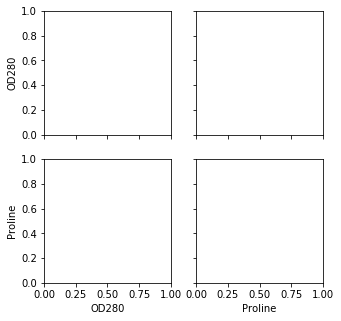

In [12]:
wine_df.corr()

sns.pairplot(wine_df, hue="Class label", size=2.5)

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [ ]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [ ]:
dt_model.fit(train_set, train_labels)

# Q9 Print the accuracy of the model & print the confusion matrix 

In [ ]:
dt_model.score(test_set , test_labels)  # performance on test data

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(train_set, train_labels)
test_pred = dt_model.predict(test_set)
dt_model.score(test_set , test_labels)

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)


In [ ]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)


In [ ]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, oob_score=True)
bgcl = bgcl.fit(train_set, train_labels)
bgcl.oob_score_     ### testing the ensemble against OOB

In [ ]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)


In [ ]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [ ]:
#Model Comparision

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
# splitting data into training and test set for independent attributes

wine_df = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
X = wine_df.drop("Cultivator", axis=1)
y = wine_df.pop("Cultivator")


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()